# _Python for Scientific Data Analysis_


#  Matplotlib

## Section 2: Subplots and Axes Configurations (continued)

In [1]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

### Twin Axes and Secondary Axes on a Plot
#### _Twin Axes_

In all the examples previously, we have plotted data and a fit to the data with a single x and y axis on a given panel.  What if we want to plot different data/fits that has different units on the same panel?   Then we have to add a _**twin**_ axis.  Okay, but what if we want to plot the _same_ data but with different units?  Well, then we need a _**secondary**_ axis.  

The key command for a twin axis is -- you guessed it -- employs the _**axes**_ container and uses a property called _twin[x,y]_: e.g. ``twin_axisx = axes.twinx()`` for a twin x axis on a given plot (i.e. you share the same x axis but are plotting different things along y).   ``twin_axisy = axes.twiny()`` is the command for a twin y axis.  

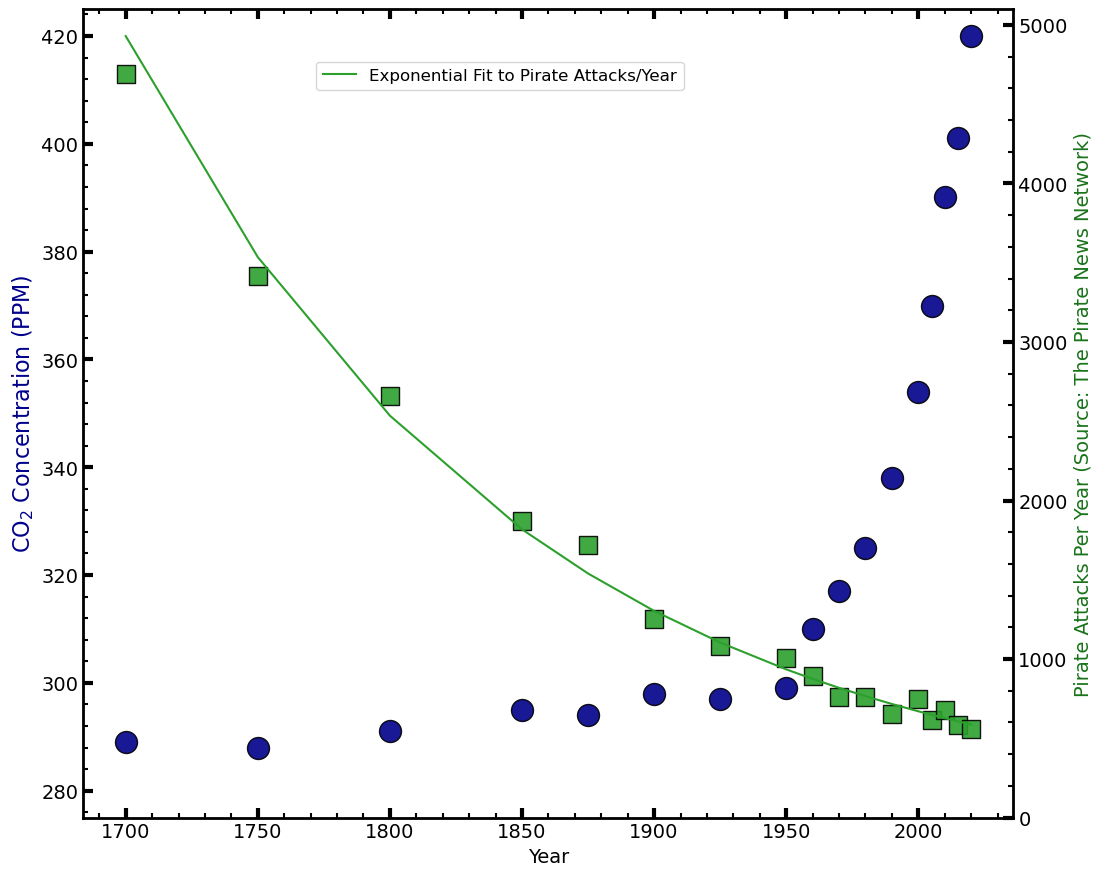

In [13]:
###(Ex_2.5)

#from matplotlib.ticker import MultipleLocator,AutoMinorLocator

CO2concentration=np.array([289,288,291,295,294,298,297,299,310,317,325,338,354,370,390.1,401,420]) #roughly estimated from NOAA
CO2years=np.array([1700,1750,1800,1850,1875,1900,1925,1950,1960,1970,1980,1990,2000,2005,2010,2015,2020])

sval=0.25 #add some noise to the number of pirate attacks/year
pirate_attacks=5000*np.exp(-1*(CO2years-CO2years[0])/150)*(1+sval*0.25*np.random.randn(len(CO2years)))

fig,axes=plt.subplots(figsize=(8*1.5,7*1.5))

 #now fit an exponential to the pirate attacks

piratefit=np.polyfit(CO2years,np.log(pirate_attacks),1)

atest=np.exp(piratefit[1])
btest=piratefit[0]

axes.scatter(CO2years,CO2concentration,marker='o',s=250,color='darkblue',edgecolor='black',alpha=0.9,label='CO2')
axes.set_xlabel('Year',fontsize=14)
axes.set_ylabel(r'CO$_{\rm 2}$ Concentration (PPM)',fontsize=16,color='darkblue')

axes.set_ylim(275,425)

axes.tick_params(which='both',width=1.5,direction='in',labelsize=14)
axes.tick_params(which='major',length=7,width=3)
axes.tick_params(which='minor',length=3.5,width=1.5)

#this makes the labels appear at top and bottom
axes.tick_params(labeltop=False,labelbottom=True,bottom=True,top=True,labelright=True)

axes.xaxis.set_ticks_position('both')
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_ticks_position('both')
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)

####THIS IS THE KEY LINE

axes2=axes.twinx()

axes2.tick_params(which='both',direction='in',labelsize=14)
axes2.set_ylim(0,5100)

axes2.scatter(CO2years,pirate_attacks,marker='s',s=150,color='tab:green',edgecolor='black',alpha=0.9)

axes2.plot(CO2years,atest*np.exp(btest*CO2years),ls='-',label='Exponential Fit to Pirate Attacks/Year',color='tab:green',)
axes2.set_ylabel(r'Pirate Attacks Per Year (Source: The Pirate News Network)',fontsize=14,color='darkgreen',alpha=0.9)

axes2.legend(loc=[0.25,0.9],fontsize='large',markerscale=0.85)


axes2.tick_params(which='both',width=1.5,direction='in',labelsize=14)

axes2.tick_params(which='major',length=7,width=3)
axes2.tick_params(which='minor',length=3.5,width=1.5)
axes2.xaxis.set_ticks_position('both')
axes2.xaxis.set_minor_locator(AutoMinorLocator(5))

axes2.yaxis.set_ticks_position('right')
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))

axes2.tick_params(labeltop=True)

#fig.tight_layout() #note: see what this does

# plt.show()

#![](./code/sect2/figures/Ex2_5.png)

#### _Secondary Axes_

The key command for a secondary axis also employs the _**axes**_ container and uses a property called _secondary\_[x,y]axis_.   

The full API is here: [https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary\_axis.html]().  For now, though, there are a few key items that you will widely need to set.  First, you need to tell where this axis will be drawn ('top','bottom','left','right').   Second, it's not enough to declare a secondary axis: you need to tell it how the numbers _map_ to the primary axis.  This is done through a _function_ keyword and an associated inverse function.  

There are different ways of defining a _function_ for use with secondary axes here.  Two options include 1) calling a separation function (i.e. a separate _def_ program) and its inverse or 2) using a _lambda_ function and its inverse (easiest if you can do this in one line).  For example, if you have two axes -- one of which is wavelength (main) and another is frequency (secondary), then you can define a _def_ that contains the following lines:

    

```
def wvlh2freq(wvlh):
 #if wvlh is in microns
 c=2.9979e14 #microns/s
 return c/wvlh

#the inverse function
def freq2wvlh(freq):
 #if frequency is in Hz
 c=2.9979e14 #microns/s
 # return wvlh in microns
 return c/freq
``` 

An equivalent lambda function would be ``lambda x: 2.9979e14/x`` (and in this case, its inverse would be the same).

The following is an example where we plot contrast vs separation for several planet imaging (extreme AO) instruments, reading in an input text file for SCExAO/CHARIS, estimating improved performance later through some function trickery, and comparing to a conventional AO imaging system.  Here, the secondary axis is projected physical separation, which we figure out given an assumed distance to our hypothetical star of 40 pc.

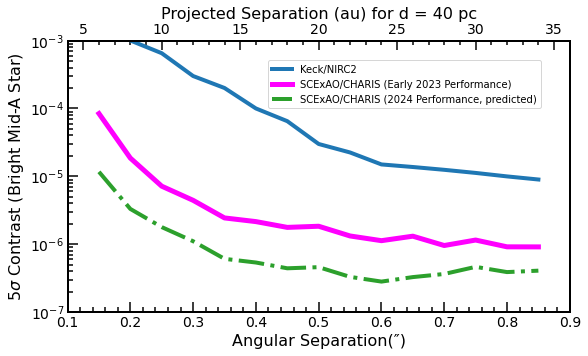

In [15]:
###(Ex_2.6)

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator
from scipy import interpolate

 #array of angular separations

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
 #a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


 #approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
 #print(fkeck)
 #exit()
contrast_5sig_keck=fkeck(ang_sep_new)
 #estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

fig,axes=plt.subplots(figsize=(9,5))

axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(1e-7,1e-3)
axes.set_xlim(0.1,0.9)

#note: setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
   #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=True,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 #log scale automatically sets minor tick marks to be reasonable here

#note: setting this to 'both' would make contrast numbers appear on left and right side of plot
axes.yaxis.set_ticks_position('left')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=16)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=16)

###IMPORTANT LINES
secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=16)
secondaxis.tick_params(which='both',direction='in',labelsize=14)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))

 #thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)
axes.legend(loc=[0.4,0.75])

# plt.show()

#![](./code/sect2/figures/Ex2_6.png)

### _Insets_

You can also produce inset plots (plots within plots): the required commands within _matplotlib_ slightly differ depending on what you are trying to do.

Case 1: to just generate a plot-within-a-plot, you still need the ``plt.subplots()`` call initially to define the _fig_ and _axes_ containers.  To add a second plot _within_ a plot, you can call ``inset_figure=fig.add_axes([location and dimensions])``.   Here the numbers in brackets should refer to the starting x, starting y, width, and height of this inset plot.  E.g. ``left,bottom,width,height=[0.5,0.5,0.33,0.25]``.   Note that the units here are in relative dimensions of the entire plot (e.g. as seen in ``plt.show()``).   

Case 2: there are cases where you want the inset to be a _zoom-in_ of the primary plot: not plotting a separate thing.   In this case, the _matplotlib_ calls are different.  We have to import another function: ``from mpl_toolkits.axes_grid.inset_locator import inset_axes``.   The call then is ``inset_figure=axes.inset_axes([x,y,width,height])`` and finally ``axes.indicate_inset_zoom(secondaxis)`` to show this second plot as a zoom-in of the major plot.

Below are two examples from the previous plot: Case 1) we create an inset plot and redo the x and y axes to plot projected separation in au and contrast in magnitudes, respectively and Case 2) we create an inset plot that is a zoom-in. 

    

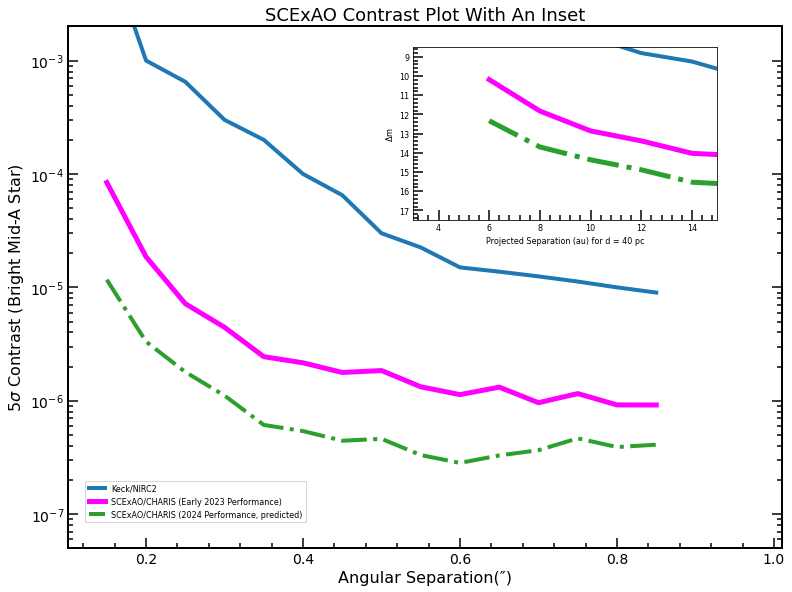

In [16]:
### Case 1(Ex_2.7)


# import matplotlib.pyplot as plot
# import numpy as np
# from scipy import interpolate
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,LogLocator

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
 #a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


 #approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
 #print(fkeck)
 #exit()
contrast_5sig_keck=fkeck(ang_sep_new)
 #estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

fig,axes=plt.subplots(figsize=(12.8,9.6))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note: setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
   #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 #log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=16)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=16)
axes.set_title('SCExAO Contrast Plot With An Inset',fontsize=18)

###IMPORTANT LINES

left,bottom,width,height=[0.5,0.6,0.33,0.25]
secondaxis=fig.add_axes([left,bottom,width,height])
 

secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_keck),linewidth=4,markersize=np.sqrt(50),color='tab:blue')
secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_twohours),linewidth=5,color='magenta')
secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_twohours_new),ls='-.',linewidth=5,color='tab:green')
secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=8)
secondaxis.set_ylabel('$\Delta$m',fontsize=8)
secondaxis.set_xlim(3,15)
secondaxis.set_ylim(17.5,8.5)
secondaxis.tick_params(which='both',direction='in',labelsize=8)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))
secondaxis.yaxis.set_minor_locator(AutoMinorLocator(5))

 #thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)

 #new legend location to avoid clashes
axes.legend(loc=[0.025,0.05],fontsize=8)

# plt.show()

#![](./code/sect2/figures/Ex2_7.png)

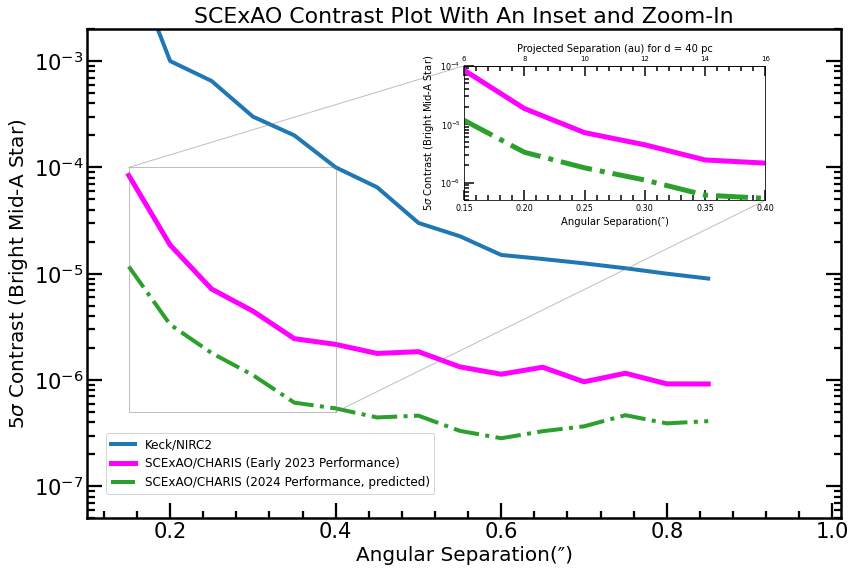

In [17]:
### Case 2(Ex_2.8)


# import matplotlib.pyplot as plot
# import numpy as np
# from scipy import interpolate
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,LogLocator



#import matplotlib.pyplot as plt
#import numpy as np

#from scipy import interpolate
#from mpl_toolkits.axes_grid.inset_locator import inset_axes
#from matplotlib.ticker import AutoMinorLocator

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
#a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


#approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
#print(fkeck)
#exit()
contrast_5sig_keck=fkeck(ang_sep_new)
#estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

scale=1.5
fig,axes=plt.subplots(figsize=(9*scale,6*scale))
#fig,axes=plt.subplots(figsize=(12.8,9))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note:setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
  #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14*scale)
axes.tick_params(which='major',length=10*scale,width=1.5*scale)
axes.tick_params(which='minor',length=5*scale,width=1.5*scale)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
#log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=20)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=20)
axes.set_title('SCExAO Contrast Plot With An Inset and Zoom-In',fontsize=22)

###IMPORTANTLINES

#secondaxis=inset_axes(axes,width=1.3,height=0.9,[0.5,0.6])
#secondaxis=axes.inset_axes([0.625, 0.65, 0.33, 0.25])
secondaxis=axes.inset_axes([0.5, 0.65, 0.4, 0.275]) #looks better in jupyter notebooks
#,width=1.3,height=0.9)
#left,bottom,width,height=[0.5,0.6,0.33,0.25]
#secondaxis=fig.add_axes([left,bottom,width,height])
#secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

secondaxis.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta')
secondaxis.plot(ang_sep_new,contrast_5sig_twohours_new,ls='-.',linewidth=5,color='tab:green')
secondaxis.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=10)
secondaxis.set_xlabel('Angular Separation(\u2033)',fontsize=10)
secondaxis.set_xlim(0.15,0.4)
secondaxis.set_ylim(5e-7,1e-4)
#secondaxis.set_ylim(5e-8,2e-3)
secondaxis.tick_params(which='both',direction='in',labelsize=8)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))
#secondaxis.yaxis.set_minor_locator(AutoMinorLocator(5))
secondaxis.set_yscale('log')

secondary_axis2=secondaxis.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))
secondary_axis2.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=10)
secondary_axis2.tick_params(which='both',direction='in',labelsize=7)
secondary_axis2.tick_params(which='major',length=10,width=1.5)
secondary_axis2.tick_params(which='minor',length=5,width=1.5)
secondary_axis2.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.indicate_inset_zoom(secondaxis)

for axl in ['top','bottom','left','right']:
  axes.spines[axl].set_linewidth(2.5)

axes.legend(loc=[0.025,0.05],fontsize=12)

### Annotations

You can annotate a plot with text and arrows.  For simple text markup, the most straightforward way is to use ``axes.text(x,y,text,ha=ha,va=va,transform=transform``, which has accepts x and y positions, your text, vertical and horizontal alignment (ha, va), and a mapping between the coordinates and the plot (transform).  Note "transform" can correspond to axis coordinates or data coordinates depend on what you set.  The API for _text_ is here [https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.text.html]().

Arrows are common markers.  The most straightforward way to draw an arrow is with ``axes.arrow(x,y,dx,dy,width=width,length=length,transform=transform,color=color,fill=[True/False])``, where the full API is given here:
[https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.arrow.html]().   Note there are fancy ways of overplotting a _circle_  but to me the simplest way is to call ``axes.scatter`` and setting the color to 'none' and symbol size _s_ to a large number.

For something more involved, ``axes.annotate`` is what you want.  The API for _annotate_ is here: [https://matplotlib.org/stable/api/_as\_gen/matplotlib.pyplot.annotate.html]() . It can accept text and properties for arrows connecting the text to the end points, usually with a dictionary of values for the arrow properties.   One of the key ones is the _connectionstyle_ property, which will allow you to draw different kinds of connecting lines with an arrowhead at the end.  The API for connection styles is here: [https://matplotlib.org/stable/gallery/userdemo/connectionstyle\_demo.html]()

Here is one modification to our previous plot that illustrates several different kinds of annotations: simple text, _annotate_ with just a straight line (done three times), _arrow_, and _annotate_ done once with a complex connection style.

                                                                                                                          

Text(0.3, 7e-06, '51 Eri b')

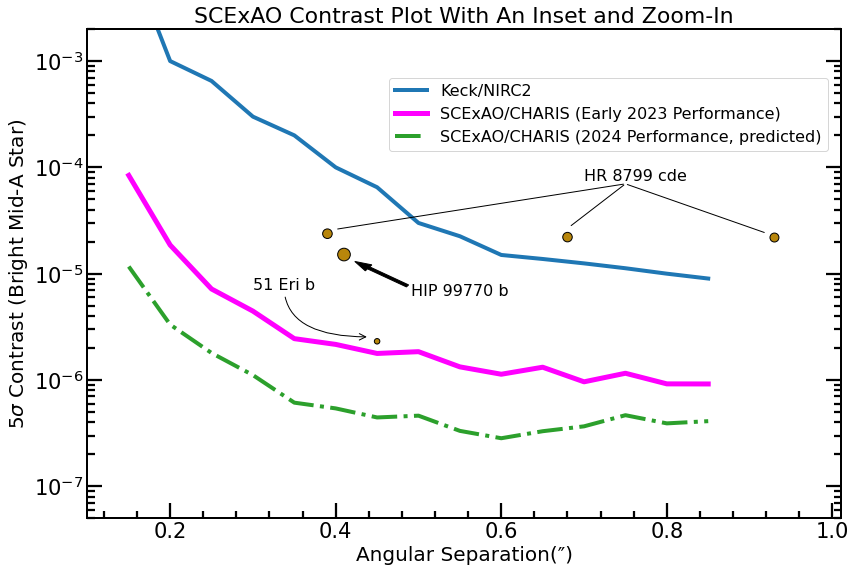

In [11]:
#Ex 2.9

from scipy import interpolate

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
#a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


#approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
#print(fkeck)
#exit()
contrast_5sig_keck=fkeck(ang_sep_new)
#estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

scale=1.5
fig,axes=plt.subplots(figsize=(9*scale,6*scale))
#fig,axes=plt.subplots(figsize=(12.8,9))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note:setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
  #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14*scale)
axes.tick_params(which='major',length=10*scale,width=1.5*scale)
axes.tick_params(which='minor',length=5*scale,width=1.5*scale)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
#log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=20)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=20)
axes.set_title('SCExAO Contrast Plot With An Inset and Zoom-In',fontsize=22)

###IMPORTANTLINES
###IMPORTANTLINES
#secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

#secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=16)
#secondaxis.tick_params(which='both',direction='in',labelsize=14)
#secondaxis.tick_params(which='major',length=10,width=1.5)
#secondaxis.tick_params(which='minor',length=5,width=1.5)
#secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))

#thicken the spines
for axl in ['top','bottom','left','right']:
  axes.spines[axl].set_linewidth(2)

axes.legend(loc=[0.4,0.75],fontsize=16)

planetnames=['HR 8799 e','HR 8799 d','HR 8799 c','51 Eri b','HIP 99770 b']
planetcontrast=10**(-0.4*(np.array([11.56,11.64,11.65,14.09,12.05])))
planetseps=np.array([0.39,0.68,0.93,0.45,0.41])
planetmass=np.array([9.2,9,8,3,16])

labeloffsetsx=np.array([0.01,0.0025,-0.01,-0.01,0.01])
labeloffsetsy=np.array([1.1,1.25,1.1,1.1,1.1])


axes.scatter(planetseps,planetcontrast,color='darkgoldenrod',edgecolor='black',s=100*planetmass/10,zorder=15)

#HR 8799 bcd labeling
axes.text(0.7,7.5e-5,'HR 8799 cde', fontsize=16)

for i in range(0,3):
 axes.annotate("",xy=(planetseps[i]+labeloffsetsx[i],labeloffsetsy[i]*planetcontrast[i]),xytext=(0.75,7.e-5),textcoords='data',arrowprops=dict(arrowstyle='-',facecolor='black'))

#HIP99770 b labeling

#note:we had to use transform=axes.transAxes because the y axis is a log plot.
axes.arrow(0.425,0.475,-0.07,0.05,width=0.005,transform=axes.transAxes,length_includes_head=True,color='black',fill=True)
#indata coordinates
axes.text(0.55,6.8e-6,'HIP 99770 b',transform=axes.transData,ha='center',va='center',fontsize=16)

#51Eri b
axes.annotate("51 Eri b",xy=(planetseps[-2]+labeloffsetsx[-2],
             labeloffsetsy[-2]*planetcontrast[-2]),xytext=(0.3,7e-6),
               textcoords='data',arrowprops=dict(arrowstyle='->',facecolor='black',
                connectionstyle="angle3,angleA=90,angleB=0"),fontsize=16)

